<a href="https://colab.research.google.com/github/MarcoFiorelli/Sperimentazioni_di_fisica_1/blob/main/guidovia_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campione 1


Importo le librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Inserisco i dati

In [2]:
t=np.array([0.29642, 0.790445, 1.1467275, 1.4427, 1.70274, 1.936905, 2.15152, 2.35167])
v=np.array([0.16868, 0.25303, 0.315105, 0.377558, 0.407349, 0.448752, 0.48452, 0.515703])
sigma_v = np.array([0.00119865, 0.00179703, 0.0022381, 0.00258676, 0.00289317, 0.00318744, 0.00344142, 0.00366416, ])

Dichiaro il modello

In [3]:
def retta(t, a, b):
  return a*t + b

Definisco il modello

In [4]:
parametri, covarianza = curve_fit(
    retta, t, v, sigma=sigma_v,
    absolute_sigma=True
)

a, b = parametri
sigma_a, sigma_b = np.sqrt(np.diag(covarianza))

Stampo i risultati della regressione lineare

In [5]:
print(f"accelerazione a = {a: .3f} + {sigma_a:.3f} m/s^2")
print(f"intercetta b = {b: .3f} + {sigma_b:.3f} m/s")

accelerazione a =  0.171 + 0.001 m/s^2
intercetta b =  0.119 + 0.001 m/s


Disegno il grafico dei punti e il fit

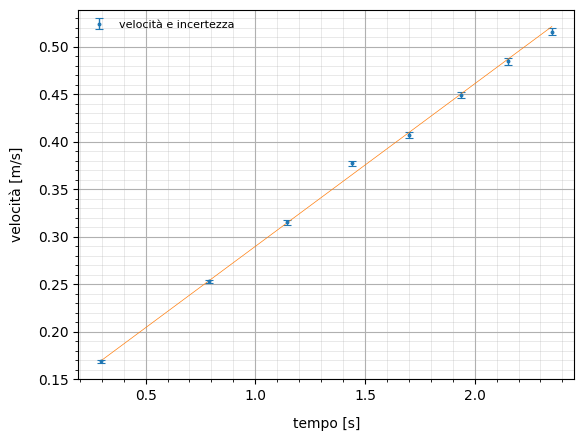

<Figure size 2400x1400 with 0 Axes>

In [6]:
t_fit = np.linspace(min(t), max(t), 200)
v_fit = retta(t_fit, a, b)

plt.errorbar(
  t, v,
  yerr=sigma_v,
  fmt='o',
  capsize=3,
  markersize=2,
  elinewidth=1,
  markeredgewidth=0.8,
  label='velocità e incertezza'
)

plt.plot(t_fit, v_fit, linewidth=0.5)

plt.xlabel('tempo [s]', labelpad=10)
plt.ylabel('velocità [m/s]', labelpad=10)
plt.grid(which='major', linewidth=0.8)
plt.grid(which='minor', linewidth=0.4, alpha=0.5)

plt.legend(
    frameon=False,
    fontsize=8,
    loc='best'
)

plt.minorticks_on()
plt.figure(figsize=(12, 7), dpi=200)
plt.show()

# Campione 2


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
t=np.array([0.29761, 0.7929, 1.14969, 1.4461, 1.70627, 1.94098, 2.15605, 2.35623])
v=np.array([0.16801, 0.25293, 0.31424, 0.36418, 0.40693, 0.44707, 0.48433, 0.51576])
sigma_v = np.array([0.00119336, 0.00179687, 0.00223226, 0.00258677, 0.00288999 ,0.00317513, 0.00344036, 0.00366261])

In [9]:
def retta(t, a, b):
  return a*t + b

In [10]:
parametri, covarianza = curve_fit(
    retta, t, v, sigma=sigma_v,
    absolute_sigma=True
)

a, b = parametri
sigma_a, sigma_b = np.sqrt(np.diag(covarianza))

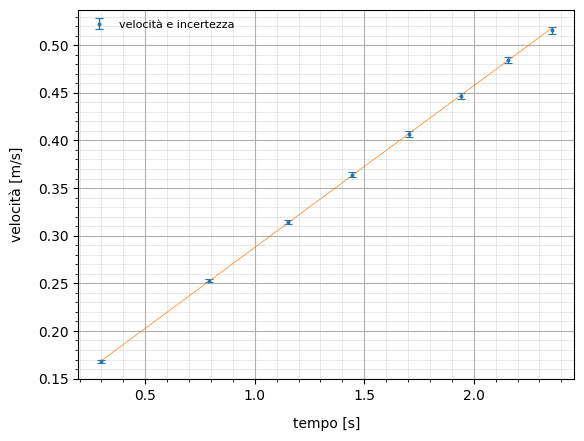

<Figure size 2400x1400 with 0 Axes>

In [11]:

t_fit = np.linspace(min(t), max(t), 200)
v_fit = retta(t_fit, a, b)

plt.errorbar(

  t, v,
  yerr=sigma_v,
  fmt='o',
  capsize=3,
  markersize=2,
  elinewidth=1,
  markeredgewidth=0.8,
  label='velocità e incertezza',
)

plt.plot(t_fit, v_fit, linewidth=0.5)

plt.xlabel('tempo [s]', labelpad=10)
plt.ylabel('velocità [m/s]', labelpad=10)
plt.grid(which='major', linewidth=0.8)
plt.grid(which='minor', linewidth=0.4, alpha=0.5)
plt.minorticks_on()

plt.legend(
    frameon=False,
    loc='best',
    fontsize=8,
)

plt.figure(figsize=(12, 7), dpi=200)
plt.show()

In [12]:
print(f"accelerazione a = {a: .5f} + {sigma_a:.5f} m/s^2")
print(f"intercetta b = {b: .5f} + {sigma_b:.5f} m/s")

accelerazione a =  0.16976 + 0.00113 m/s^2
intercetta b =  0.11788 + 0.00131 m/s


# Grafico potenza-massa


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

In [14]:
tempi_1 = np.array([0.4667, 0.4669, 0.4666, 0.4665, 0.4669, 0.4667, 0.4675, 0.4671, 0.4673, 0.4671])
tempi_2 = np.array([0.4699, 0.4703, 0.4697, 0.4697, 0.4699, 0.4703, 0.4706, 0.4701, 0.4696, 0.4698])
tempi_3 = np.array([0.4679, 0.4679, 0.4681, 0.4685, 0.4686, 0.4688, 0.4688, 0.4683, 0.4683, 0.4679])

dati = [tempi_1, tempi_2, tempi_3]

In [15]:
etichette = [
  "78g - 3",
  "78g - 4",
  "60g - 3",
]

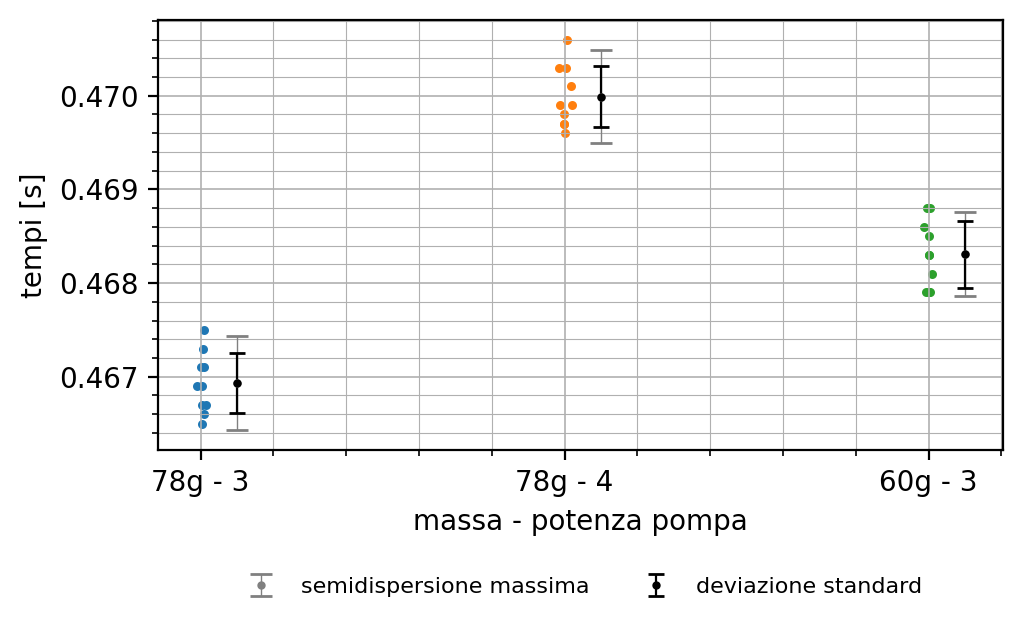

In [16]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200, constrained_layout=True)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(etichette)
ax.set_xlabel('massa - potenza pompa')
ax.set_ylabel('tempi [s]')

for i, tempi in enumerate(dati, start=1):
    x = np.random.normal(i, 0.01, size=len(tempi))
    ax.scatter(x, tempi, s=5)

    media = np.mean(tempi)
    std = np.std(tempi, ddof=1)
    disp_max = (np.max(tempi) - np.min(tempi)) / 2

    x_err = i + 0.10

    ax.errorbar(
        x_err, media, yerr=disp_max,
        fmt='o', markersize=2,
        capsize=4, linewidth=0.5, color='grey',
        label='semidispersione massima' if i == 1 else None
    )
    ax.errorbar(
        x_err, media, yerr=std,
        fmt='o', markersize=2,
        capsize=3, linewidth=0.8, color='black',
        label='deviazione standard' if i == 1 else None
    )

ax.grid(which='major', linewidth=0.6)
ax.grid(which='minor', linewidth=0.4)
ax.minorticks_on()

ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    fontsize=8,
    frameon=False
)

plt.show()



In [17]:
#----CAMPIONE 1

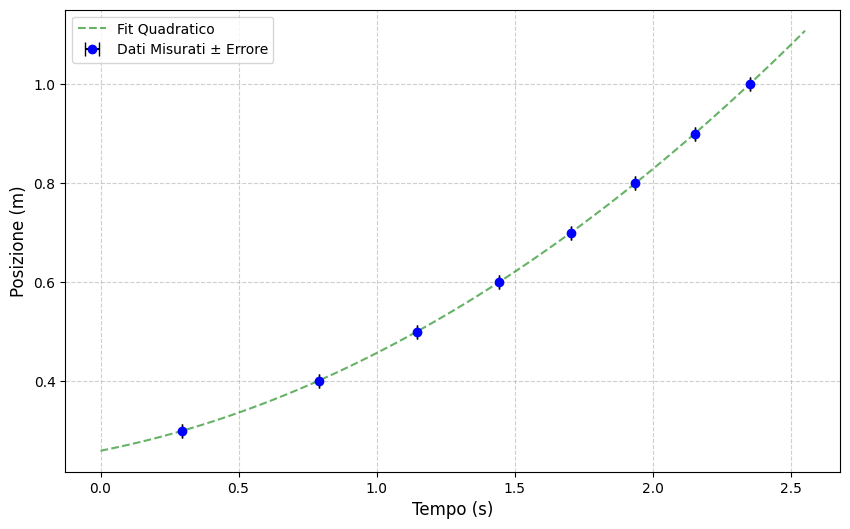

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
t = np.array([0.29642, 0.790445, 1.1467275, 1.4427, 1.70274, 1.936905, 2.15152, 2.35167])
s = np.array([30, 40, 50, 60, 70, 80, 90, 100]) / 100.0

err_t = np.array([
    0.000173973,
    0.000067412,
    0.0000623241,
    0.00005666,
    0.0000458258,
    0.0000452155,
    0.0000406885,
    0.0000525991
])


coeff = np.polyfit(t, s, 2)
poly = np.poly1d(coeff)
t_fit = np.linspace(0, max(t) + 0.2, 100)

plt.figure(figsize=(10, 6))
plt.errorbar(t, s, xerr=err_t, fmt='o', color='blue',
             ecolor='black', capsize=5, label='Dati Misurati ± Errore')

plt.plot(t_fit, poly(t_fit), 'g--', label='Fit Quadratico', alpha=0.6)


plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Posizione (m)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [19]:
#---CAMPIONE 2

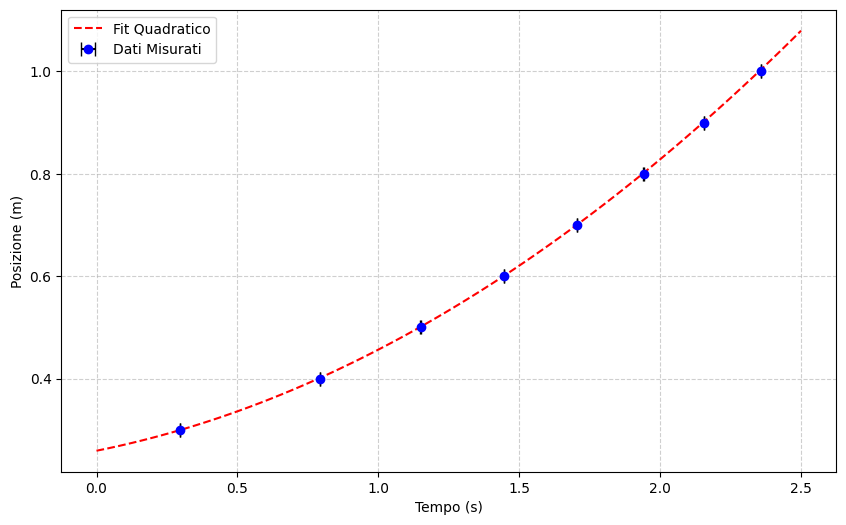

In [20]:

t2 = np.array([0.29761, 0.7929, 1.14969, 1.4461, 1.70627, 1.94098, 2.15605, 2.35623])
s2= np.array([30, 40, 50, 60, 70, 80, 90, 100]) / 100.0

sigma_t2 = np.array([0.000173973, 0.000067412, 0.0000623241, 0.00005666,
                    0.0000458258, 0.0000452155, 0.0000406885, 0.0000525991])

sigma_s2 = np.array([0.00013, 0.00010, 0.00007, 0.00006,
                    0.00004, 0.00004, 0.00004, 0.00003])

coeff = np.polyfit(t, s, 2)
poly_s = np.poly1d(coeff)
a_calc = 2 * coeff[0]



plt.figure(figsize=(10, 6))

plt.errorbar(t2, s2, xerr=sigma_t2, fmt='o', color='blue',
             ecolor='black', capsize=5, label='Dati Misurati', zorder=5)

plt.plot(np.linspace(0, 2.5, 100), poly_s(np.linspace(0, 2.5, 100)),
         'r--', label=f'Fit Quadratico')

plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

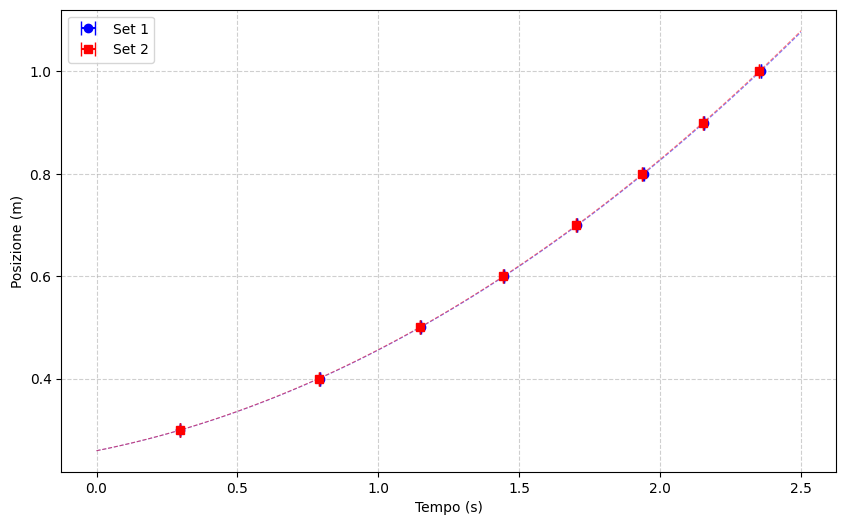

In [21]:

t1 = np.array([0.29761, 0.7929, 1.14969, 1.4461, 1.70627, 1.94098, 2.15605, 2.35623])
s1 = np.array([30, 40, 50, 60, 70, 80, 90, 100]) / 100.0
sig_t1 = np.array([0.00017, 0.00006, 0.00006, 0.00005, 0.00004, 0.00004, 0.00004, 0.00005])
sig_s1 = np.array([0.00013, 0.00010, 0.00007, 0.00006, 0.00004, 0.00004, 0.00004, 0.00003])


t2 = np.array([0.29642, 0.790445, 1.1467275, 1.4427, 1.70274, 1.936905, 2.15152, 2.35167])
s2 = s1
sig_t2 = sig_t1


p1 = np.poly1d(np.polyfit(t1, s1, 2))
p2 = np.poly1d(np.polyfit(t2, s2, 2))
x_line = np.linspace(0, 2.5, 100)

plt.figure(figsize=(10, 6))


plt.errorbar(t1, s1, xerr=sig_t1, fmt='o', color='blue',
             label='Set 1', capsize=5)
plt.plot(x_line, p1(x_line), 'b--', alpha=0.5, linewidth=0.8)


plt.errorbar(t2, s2, xerr=sig_t2, fmt='s', color='red',
             label='Set 2', capsize=5)
plt.plot(x_line, p2(x_line), 'r--', alpha=0.5, linewidth=0.8)

plt.xlabel('Tempo (s)')
plt.ylabel('Posizione (m)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()